In [2152]:
import cv2
from matplotlib import pyplot as plt
import numpy as np
import imutils
import easyocr

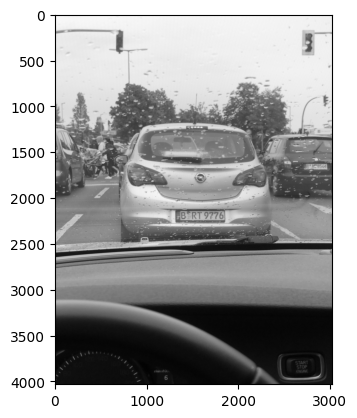

In [2153]:
big_img = cv2.imread("plates/car_20.jpg")
(height, width, _) = big_img.shape
new_height = 800
new_width = int((new_height / height) * width)
img = big_img
# img = cv2.resize(big_img, (new_width, new_height), interpolation=cv2.INTER_AREA)
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
plt.imshow(cv2.cvtColor(gray, cv2.COLOR_BGR2RGB))

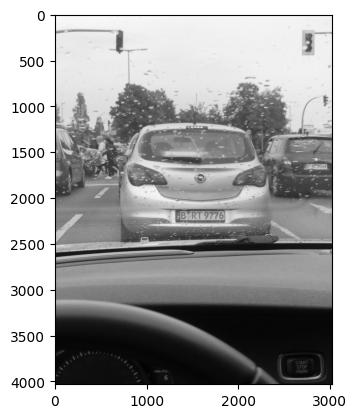

In [2154]:
bfilter = cv2.bilateralFilter(gray, 11, 17, 17)
plt.imshow(cv2.cvtColor(bfilter, cv2.COLOR_BGR2RGB))

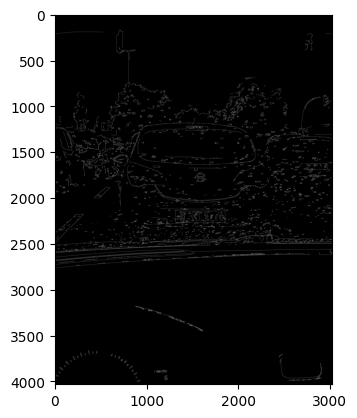

In [2155]:
edged = cv2.Canny(bfilter, 30, 200) #Edge detection
plt.imshow(cv2.cvtColor(edged, cv2.COLOR_BGR2RGB))

776.5
contours: 167
rects: 1


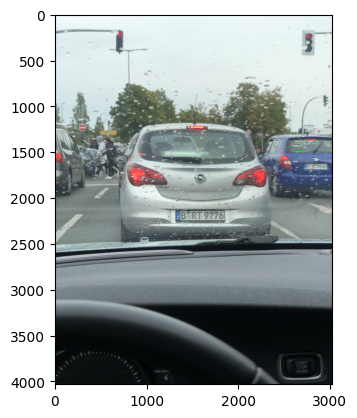

In [2156]:
keypoints = cv2.findContours(edged.copy(), cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)
contours = imutils.grab_contours(keypoints)
location = sorted(contours, key=cv2.contourArea, reverse=True)
approx = None

tmp_img = img
tmp_res = None
rects = []
for contour in sorted(contours, key=cv2.contourArea, reverse=True)[:10]:
    peri = cv2.arcLength(contour, True)
    rect = cv2.approxPolyDP(contour, 0.018 * peri, True)
    # rect = cv2.approxPolyDP(contour, 10, True)
    if len(rect) == 4:
        rects.append(rect)
        print(cv2.contourArea(contour))
        location = contour
        approx = rect
        # cv2.polylines(tmp_img, rect, True, (255, 255, 0), 4)
        cv2.rectangle(tmp_img, tuple(rect[0][0]), tuple(rect[2][0]), (0,255,0), 6)
        # break
print(f"contours: {len(contour)}")
print(f"rects: {len(rects)}")
plt.imshow(cv2.cvtColor(tmp_img, cv2.COLOR_BGR2RGB))

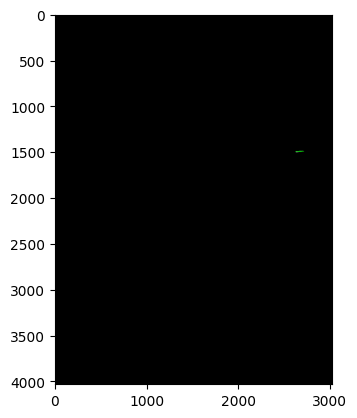

In [2157]:
mask = np.zeros(gray.shape, np.uint8)
new_image = cv2.drawContours(mask, [location], 0, 255, -1)
new_image = cv2.bitwise_and(img, img, mask=mask)
plt.imshow(cv2.cvtColor(new_image, cv2.COLOR_BGR2RGB))

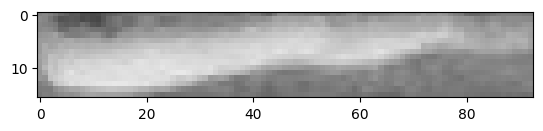

In [2158]:
(x, y) = np.where(mask==255)
(x1, y1) = (np.min(x), np.min(y))
(x2, y2) = (np.max(x), np.max(y))
cropped_image = gray[x1:x2+1, y1:y2+1]
plt.imshow(cv2.cvtColor(cropped_image, cv2.COLOR_BGR2RGB))


In [2159]:
reader = easyocr.Reader(['en'])
result = reader.readtext(cropped_image)
result

CUDA not available - defaulting to CPU. Note: This module is much faster with a GPU.


[]

plate: 


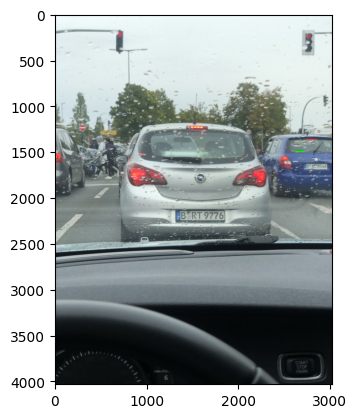

In [2160]:
parts = map(lambda x: x[-2], result)
text = " ".join(parts)
print(f"plate: {text}")
font = cv2.FONT_HERSHEY_SIMPLEX
res = None
res = cv2.rectangle(img, tuple(approx[0][0]), tuple(approx[2][0]), (0,255,0), 10)
res = cv2.putText(img, text=text, org=(approx[0][0][0], approx[1][0][1]), fontFace=font, fontScale=1, color=(0,0,255), thickness=6, lineType=cv2.LINE_AA)
plt.imshow(cv2.cvtColor(res, cv2.COLOR_BGR2RGB))